# Smoothing data

This notebook highlights how signals can be smoothed with the smooth function.

In [1]:
using PyPlot
using Spectra

## Signal generation

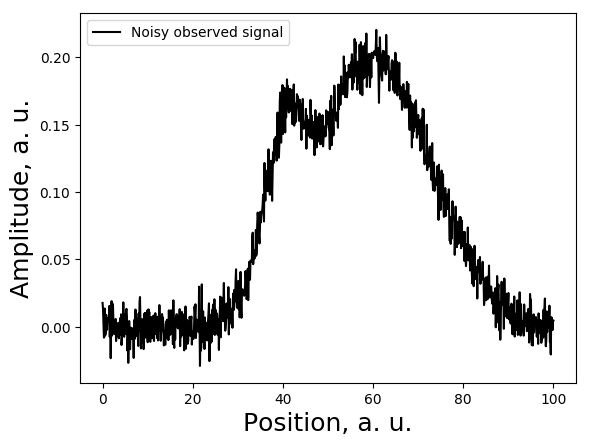

PyObject <matplotlib.legend.Legend object at 0x322dcad10>

In [2]:
# the x axis
x = collect(0:0.1:100)

# a scale factor that you can change
scale = 0.01

# a fake signal: perfect y
y_tot, y_peaks = gaussiennes([10;20.],[40.;60],[5.;15],x)
y_perfect = scale.*y_tot

# we add noise: observed y
y = scale.*(y_tot + randn(size(y_tot,1)))

figure()
plot(x,y,"k-",label="Noisy observed signal")
xlabel("Position, a. u.",fontname="Sans",fontsize = 18)
ylabel("Amplitude, a. u.", fontname = "Sans", fontsize = 18)
legend()

## Smoothing with Savitsky-Golay and GCVspline

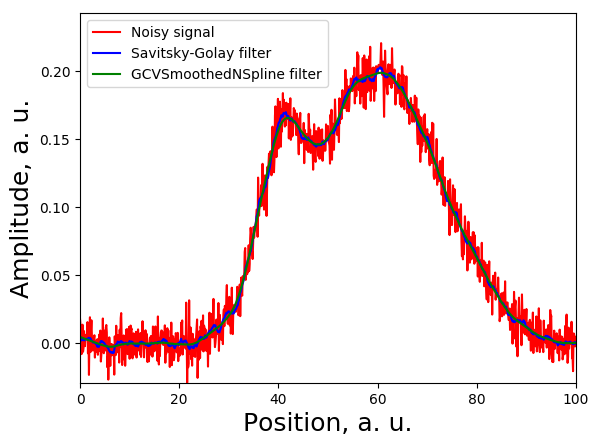

PyObject <matplotlib.legend.Legend object at 0x32655e590>

In [3]:
y_sv = smooth(x,y,filter=:SavitzkyGolay,M=15,N=2)
y_gcv = smooth(x,y,filter=:GCVSmoothedNSpline,ese_y = std(y[0 .< x .< 20]))

figure()
plot(x,y,"r-",label="Noisy signal")
plot(x,y_sv,"b-",label="Savitsky-Golay filter")
plot(x,y_gcv,"g-",label="GCVSmoothedNSpline filter")
xlabel("Position, a. u.",fontname="Sans",fontsize = 18)
ylabel("Amplitude, a. u.", fontname = "Sans", fontsize = 18)

xlim(minimum(x),maximum(x))
ylim(minimum(y),maximum(y)+0.1.*maximum(y))
legend(loc=2)

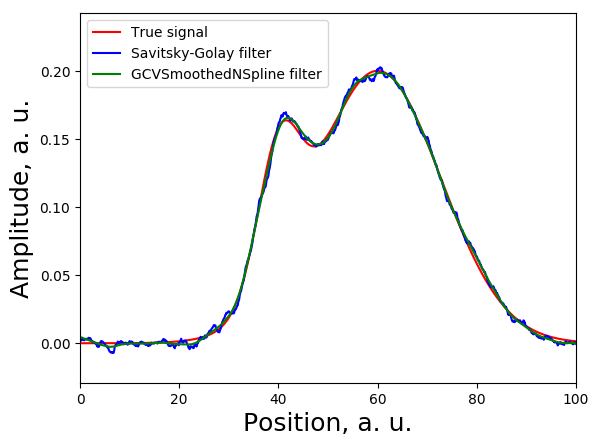

PyObject <matplotlib.legend.Legend object at 0x32678e610>

In [4]:
figure()
plot(x,y_perfect,"r-",label="True signal")
plot(x,y_sv,"b-",label="Savitsky-Golay filter")
plot(x,y_gcv,"g-",label="GCVSmoothedNSpline filter")
xlabel("Position, a. u.",fontname="Sans",fontsize = 18)
ylabel("Amplitude, a. u.", fontname = "Sans", fontsize = 18)

xlim(minimum(x),maximum(x))
ylim(minimum(y),maximum(y)+0.1.*maximum(y))
legend(loc=2)

In [5]:
ese_noise = sum((y - y_perfect).^2)
ese_sg = sum((y_sv-y_perfect).^2)
ese_gcv = sum((y_gcv-y_perfect).^2)

println("Summed errors between the noisy, Savitzky-Golay, GCVspline y values and the perfect signals are, respectively, of:")
println([ese_noise ese_sg ese_gcv])

Summed errors between the noisy, Savitzky-Golay, GCVspline y values and the perfect signals are, respectively, of:
[0.102219 0.00904926 0.0040083]
